In [2]:
#Tasks: 1.
#Data Preprocessing: 
  # o Load the dataset. 
  # o Handle missing values. 
  # o Encode categorical variables. 
  # o Scale/normalize the features.

In [1]:
#importing Neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

In [2]:
# Load the dataset
data=pd.read_csv('data.csv')
data.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,Class1
1,4.9,3.0,1.4,0.2,Class1
2,4.7,3.2,1.3,0.2,Class1
3,4.6,3.1,1.5,0.2,Class1
4,5.0,3.6,1.4,0.2,Class1


In [3]:
# Handle missing values.
missing_values=data.isnull().sum()
print("The missing values are :", missing_values)

The missing values are : feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64


In [4]:
#Encode categorical variables. 
label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['target'])

In [5]:
#Scale/normalize the features.
features=data.drop('target', axis=1)
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
# Convert the scaled features back to a DataFrame
scaled_data=pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['target']=data['target']
data.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Split the data into training and testing sets
X=scaled_data.drop('target', axis=1)
y=scaled_data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
#2. Exploratory Data Analysis (EDA): 
  # o Provide statistical summaries of the dataset. 
  # o Visualize the data distribution and relationships between features using plots. 

In [7]:
#Provide statistical summaries of the dataset.
print(scaled_data.describe())

           feature1      feature2      feature3      feature4      target
count  1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02  149.000000
mean  -1.430623e-16 -3.099683e-16  4.768743e-17 -1.430623e-16    1.006711
std    1.003373e+00  1.003373e+00  1.003373e+00  1.003373e+00    0.817847
min   -1.882359e+00 -2.425614e+00 -1.575313e+00 -1.456862e+00    0.000000
25%   -9.110290e-01 -5.863444e-01 -1.234147e+00 -1.193264e+00    0.000000
50%   -6.111554e-02 -1.265269e-01  3.579562e-01  1.247222e-01    1.000000
75%    6.673817e-01  5.631992e-01  7.559821e-01  7.837155e-01    2.000000
max    2.488625e+00  3.092195e+00  1.779477e+00  1.706306e+00    2.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


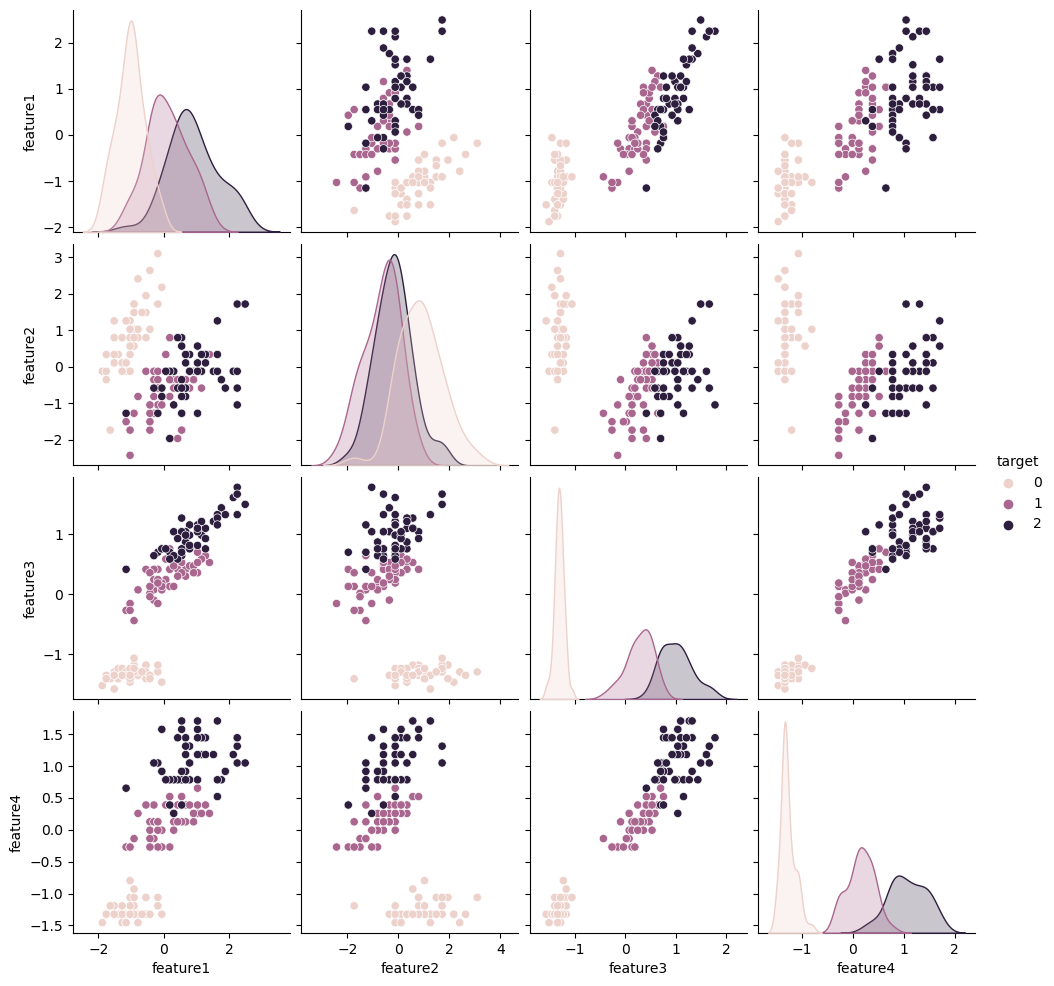

In [25]:
#Visualize the data distribution and relationships between features using plots. 
sns.pairplot(scaled_data, hue='target')
plt.show()

In [22]:
#3. Classification: 
   #o Apply Logistic Regression, Decision Tree, and Random Forest classifiers. 
   #o Use a confusion matrix to evaluate the performance of each classifier. 
   #o Perform cross-validation to assess the model stability.

In [27]:
#o Apply Logistic Regression, Decision Tree, and Random Forest classifiers.
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [28]:
 #o Use a confusion matrix to evaluate the performance of each classifier. 
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix:\n", cm)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"{name} Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"{name} F1 Score: {f1_score(y_test, y_pred, average='weighted')}")


Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Logistic Regression Accuracy: 0.9
Logistic Regression Precision: 0.9214285714285714
Logistic Regression Recall: 0.9
Logistic Regression F1 Score: 0.896

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Decision Tree Accuracy: 0.9
Decision Tree Precision: 0.9214285714285714
Decision Tree Recall: 0.9
Decision Tree F1 Score: 0.896

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Random Forest Accuracy: 0.9
Random Forest Precision: 0.9214285714285714
Random Forest Recall: 0.9
Random Forest F1 Score: 0.896


In [10]:
#o Perform cross-validation to assess the model stability.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kf)
    print(f"\n{name} Cross-Validation Mean Score: {cv_scores.mean()}")
    print(f"{name} Cross-Validation Std Dev: {cv_scores.std()}")


Logistic Regression Cross-Validation Mean Score: 0.9533333333333334
Logistic Regression Cross-Validation Std Dev: 0.039999999999999994

Decision Tree Cross-Validation Mean Score: 0.9466666666666667
Decision Tree Cross-Validation Std Dev: 0.03399346342395189

Random Forest Cross-Validation Mean Score: 0.9533333333333334
Random Forest Cross-Validation Std Dev: 0.039999999999999994


In [28]:
#4. Regression: 
 #o Apply Linear Regression and Decision Tree Regressor. 
 #o Evaluate the models using R-squared and Mean Squared Error (MSE). 
 #o Perform cross-validation to assess the model stability.

In [11]:
#o Apply Linear Regression and Decision Tree Regressor.
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [12]:
#o Evaluate the models using R-squared and Mean Squared Error (MSE). 
y_reg = scaled_data['feature1']
X_reg = scaled_data.drop('feature1', axis=1)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

for name, reg in regressors.items():
    reg.fit(X_reg_train, y_reg_train)
    y_reg_pred = reg.predict(X_reg_test)
    print(f"\n{name} R-squared: {r2_score(y_reg_test, y_reg_pred)}")
    print(f"{name} Mean Squared Error: {mean_squared_error(y_reg_test, y_reg_pred)}")


Linear Regression R-squared: 0.8388113342649274
Linear Regression Mean Squared Error: 0.1549854123710136

Decision Tree Regressor R-squared: 0.672407625083048
Decision Tree Regressor Mean Squared Error: 0.31498517023245115


In [13]:
#o Perform cross-validation to assess the model stability.
for name, reg in regressors.items():
    cv_scores = cross_val_score(reg, X_reg, y_reg, cv=kf, scoring='neg_mean_squared_error')
    print(f"\n{name} Cross-Validation Mean MSE: {-cv_scores.mean()}")
    print(f"{name} Cross-Validation Std Dev MSE: {cv_scores.std()}")
 


Linear Regression Cross-Validation Mean MSE: 0.15175063209300987
Linear Regression Cross-Validation Std Dev MSE: 0.017901844483952305

Decision Tree Regressor Cross-Validation Mean MSE: 0.2803671325335485
Decision Tree Regressor Cross-Validation Std Dev MSE: 0.06636538453660769


In [34]:
#5. Confusion Matrix: 
 # o For classification tasks, plot the confusion matrix and compute the following 
  # metrics: 
       #▪ Accuracy 
       #▪ Precision 
       #▪ Recall 
      #▪ F1 Score 


Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


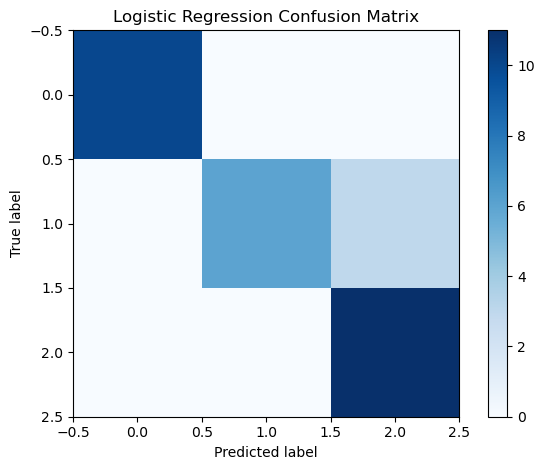

Logistic Regression Accuracy: 0.9
Logistic Regression Precision: 0.9214285714285714
Logistic Regression Recall: 0.9
Logistic Regression F1 Score: 0.896

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


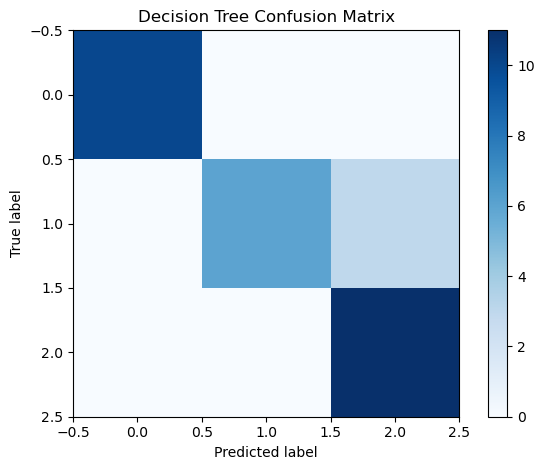

Decision Tree Accuracy: 0.9
Decision Tree Precision: 0.9214285714285714
Decision Tree Recall: 0.9
Decision Tree F1 Score: 0.896

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


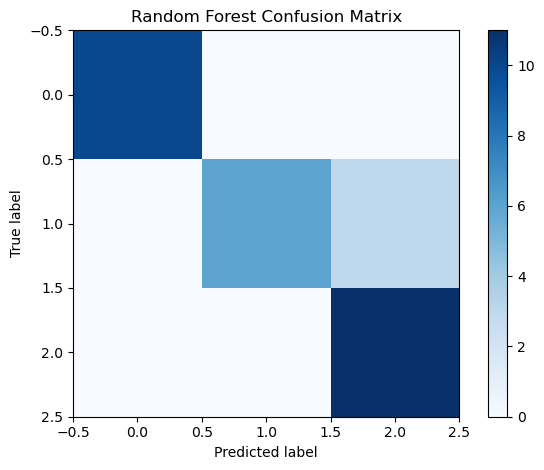

Random Forest Accuracy: 0.9
Random Forest Precision: 0.9214285714285714
Random Forest Recall: 0.9
Random Forest F1 Score: 0.896


In [26]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
 #For classification tasks, plot the confusion matrix and compute the following 
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix:\n", cm)   
    # Plot confusion matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    #metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")
    print(f"{name} F1 Score: {f1}")


In [ ]:
#6. Cross-Validation: 
     #o Implement k-fold cross-validation for both classification and regression models. 
    #o Report the mean and standard deviation of the cross-validation scores. 

In [38]:
from sklearn.model_selection import cross_val_score, KFold
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Cross-validation for classifiers
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kf)
    print(f"\n{name} Cross-Validation Mean Score: {cv_scores.mean()}")
    print(f"{name} Cross-Validation Std Dev: {cv_scores.std()}")

# Cross-validation for regressors
for name, reg in regressors.items():
    cv_scores = cross_val_score(reg, X_reg, y_reg, cv=kf, scoring='neg_mean_squared_error')
    print(f"\n{name} Cross-Validation Mean MSE: {-cv_scores.mean()}")
    print(f"{name} Cross-Validation Std Dev MSE: {cv_scores.std()}")



Logistic Regression Cross-Validation Mean Score: 0.9533333333333334
Logistic Regression Cross-Validation Std Dev: 0.039999999999999994

Decision Tree Cross-Validation Mean Score: 0.9397701149425288
Decision Tree Cross-Validation Std Dev: 0.0247016816104157

Random Forest Cross-Validation Mean Score: 0.9464367816091954
Random Forest Cross-Validation Std Dev: 0.03386106232555764

Linear Regression Cross-Validation Mean MSE: 0.15175063209300987
Linear Regression Cross-Validation Std Dev MSE: 0.017901844483952305

Decision Tree Regressor Cross-Validation Mean MSE: 0.2615542708814652
Decision Tree Regressor Cross-Validation Std Dev MSE: 0.03728589257979575
